## Installing the required libraries . 
[Matplotlib - plotting
Pandas (exporting the csv) 
Scikit-learn to import metrics and packages]

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

## Mounting the CSV files on the Google drive to make it easy for importing

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reading the Country data CSV file 

In [57]:
dc_blobs= pd.read_csv('/content/drive/MyDrive/CS564/cluster_blobs.csv')
dc_circles= pd.read_csv('/content/drive/MyDrive/CS564/cluster_circles.csv')
dc_moons= pd.read_csv('/content/drive/MyDrive/CS564/cluster_moons.csv')

In [58]:
## Displaying the blob data
dc_blobs.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


In [59]:
## Displaying the circles data
dc_circles.head()

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354


In [60]:
## Displaying the moons data
dc_moons.head()

,X_1,X_2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


## Data Cleaning (Checking NULL or NAN values)

In [61]:
## Checking Null Values for all  the data
print('NULL Value for blob : ',dc_blobs.isnull().sum().sum())
print('NULL Value for Circles : ',dc_circles.isnull().sum().sum())
print('NULL Value for moon : ',dc_moons.isnull().sum().sum())
## Checking NAN Values for al the data
print('NAN Value for blob :',dc_blobs.isnull().sum().sum()) 
print('NAN Value for circles :',dc_circles.isnull().sum().sum()) 
print('NAN Value for moons:',dc_moons.isnull().sum().sum()) 

NULL Value for blob :  0
NULL Value for Circles :  0
NULL Value for moon :  0
NAN Value for blob : 0
NAN Value for circles : 0
NAN Value for moons: 0


## Data Scaling for blob data

In [62]:
#Scaling the given data
scaler = MinMaxScaler()
dc_blobs_scaled=scaler.fit_transform(dc_blobs)
scaled_dc_blobs=pd.DataFrame(dc_blobs_scaled,columns=dc_blobs.columns)

In [63]:
scaled_dc_blobs

,X1,X2
0,0.762231,0.842572
1,0.769209,0.821952
2,0.234057,0.788471
3,0.153158,0.823683
4,0.775996,0.849757
...,...,...
1495,0.572908,0.140031
1496,0.576138,0.115858
1497,0.688508,0.831543
1498,0.802947,0.823933


In [64]:
db_blb = DBSCAN(eps=0.35, min_samples=10).fit(scaled_dc_blobs)
core_samples_mask = np.zeros_like(db_blb.labels_, dtype=bool)
#core_samples_mask

In [65]:
core_samples_mask[db_blb.core_sample_indices_] = True
#core_samples_mask

number of clusters: 3


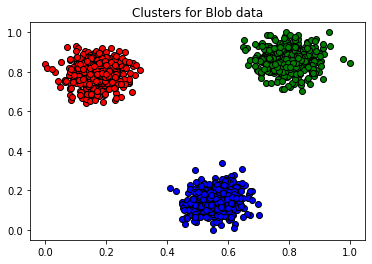

Silhouette Coefficient:0.86


In [67]:
labels = db_blb.labels_
## Defining the number of clusters and since the noise is negligible,thus ignoring it
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

unique_labels = set(labels)
colors = ['green', 'red','blue']
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
  
    class_member_mask = (labels == k)
  
    xy1 = dc_blobs_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy1[:, 0], xy1[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
    
print('number of clusters: %d' % n_clusters_)
plt.title("Clusters for Blob data")
plt.show()
sc = metrics.silhouette_score(dc_blobs_scaled, labels)
print("Silhouette Coefficient:%0.2f"%sc)

## Data Scaling for Circles data

In [68]:
#Scaling the given data
scaler = MinMaxScaler()
dc_circles_scaled=scaler.fit_transform(dc_circles)
scaled_dc_circles=pd.DataFrame(dc_circles_scaled,columns=dc_circles.columns)

In [69]:
scaled_dc_circles

,X1,X2
0,0.360103,0.484668
1,0.436480,0.046644
2,0.648755,0.428713
3,0.167392,0.153292
4,0.189409,0.136085
...,...,...
1495,0.382814,0.515405
1496,0.551493,0.357260
1497,0.638915,0.430353
1498,0.527028,0.359749


In [70]:
db_circles = DBSCAN(eps=0.112, min_samples=10).fit(scaled_dc_circles)
core_samples_mask = np.zeros_like(db_circles.labels_, dtype=bool)

In [71]:
core_samples_mask[db_circles.core_sample_indices_] = True

number of clusters: 2


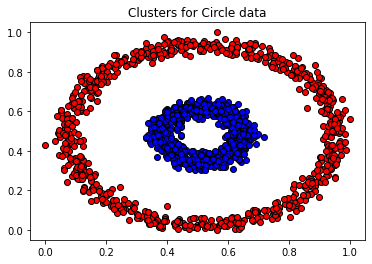

Silhouette Coefficient:0.21


In [72]:
labels = db_circles.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)
colors = ['blue', 'red','yellow']
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
  
    class_member_mask = (labels == k)
  
    xy1 = scaled_dc_circles[class_member_mask & core_samples_mask]
    plt.plot(xy1.X1, xy1.X2, 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

print('number of clusters: %d' % n_clusters_)
plt.title("Clusters for Circle data")
plt.show()
sc = metrics.silhouette_score(scaled_dc_circles, labels)
print("Silhouette Coefficient:%0.2f"%sc)

## Data Scaling for Moons data

In [73]:
#Scaling the given data
scaler = MinMaxScaler()
dc_moon_scaled=scaler.fit_transform(dc_moons)
scaled_dc_moon=pd.DataFrame(dc_moon_scaled,columns=dc_moons.columns)

In [74]:
scaled_dc_moon

,X_1,X_2
0,0.557050,0.105134
1,0.829157,0.222315
2,0.846242,0.227466
3,0.351340,0.616799
4,0.815547,0.136863
...,...,...
1495,0.957051,0.466586
1496,0.646851,0.579356
1497,0.109260,0.692265
1498,0.909198,0.270994


In [75]:
db_moon = DBSCAN(eps=0.142, min_samples=10).fit(scaled_dc_moon)
core_samples_mask = np.zeros_like(db_moon.labels_, dtype=bool)

In [76]:
core_samples_mask[db_moon.core_sample_indices_] = True

number of clusters: 2


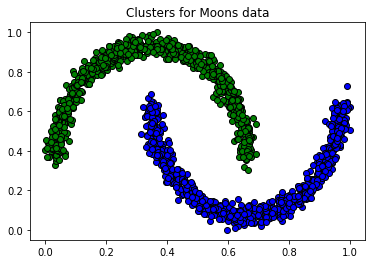

Silhouette Coefficient:0.39


In [77]:
labels = db_moon.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)
colors = ['blue','green']
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
  
    class_member_mask = (labels == k)
  
    xy1 = scaled_dc_moon[class_member_mask & core_samples_mask]
    plt.plot(xy1.X_1, xy1.X_2, 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

print('number of clusters: %d' % n_clusters_)
plt.title("Clusters for Moons data")
plt.show()
sc = metrics.silhouette_score(scaled_dc_moon, labels)
print("Silhouette Coefficient:%0.2f"%sc)

## Applying K-means on the blob data

In [39]:
## Applying the K-Means
blobs_kmeans= KMeans(n_clusters = 3,random_state = 101)
## Fitting the data
blobs_kmeans.fit(scaled_dc_blobs)
pd.Series(blobs_kmeans.labels_).value_counts()

prediction = blobs_kmeans.labels_
dc_pca_cluster=pd.DataFrame(scaled_dc_blobs)
dc_cluster_data = pd.DataFrame(dc_blobs)
dc_cluster_data['KMeans_Clusters'] = prediction
dc_pca_cluster['KMeans_Clusters']=prediction

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


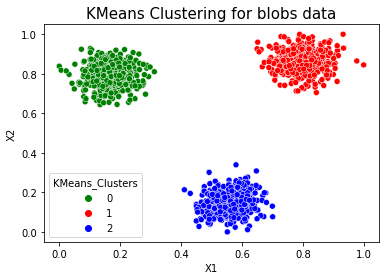

<Figure size 936x936 with 0 Axes>

In [40]:
sns.scatterplot(dc_pca_cluster['X1'],dc_pca_cluster['X2'],hue='KMeans_Clusters',data=dc_pca_cluster,palette=['green', 'red','blue'], legend='full') 
plt.title("KMeans Clustering for blobs data",fontsize=15)
plt.figure(figsize=(13, 13))
plt.show()

In [41]:
print('Silhouette Score for K-Means :',metrics.silhouette_score(scaled_dc_blobs, blobs_kmeans.labels_))

Silhouette Score for K-Means : 0.9244452221951406


## Applying K-means on the Circle data

In [42]:
## Applying the K-Means
circle_kmeans= KMeans(n_clusters = 2,random_state = 101)
## Fitting the data
circle_kmeans.fit(scaled_dc_circles)
pd.Series(circle_kmeans.labels_).value_counts()

prediction = circle_kmeans.labels_
circles_cluster=pd.DataFrame(scaled_dc_circles)
dc_cluster_circles = pd.DataFrame(dc_circles)
dc_cluster_circles['KMeans_Clusters'] = prediction
circles_cluster['KMeans_Clusters']=prediction

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


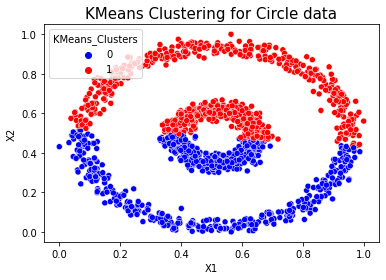

<Figure size 936x936 with 0 Axes>

In [51]:
sns.scatterplot(circles_cluster['X1'],circles_cluster['X2'],hue='KMeans_Clusters',data=circles_cluster,palette=['blue', 'red'], legend='full') 
plt.title("KMeans Clustering for Circle data",fontsize=15)
plt.figure(figsize=(13, 13))
plt.show()

In [50]:
print('Silhouette Score for K-Means :',metrics.silhouette_score(scaled_dc_circles, circle_kmeans.labels_))

Silhouette Score for K-Means : 0.7030788536374564


## Applying K-means on the moon data

In [49]:
## Applying the K-Means
moons_kmeans= KMeans(n_clusters = 2,random_state = 101)
## Fitting the data
moons_kmeans.fit(scaled_dc_blobs)
pd.Series(moons_kmeans.labels_).value_counts()

prediction = moons_kmeans.labels_
moons_cluster=pd.DataFrame(scaled_dc_moon)
scled_cluster_moons = pd.DataFrame(dc_moons)
scled_cluster_moons['KMeans_Clusters'] = prediction
moons_cluster['KMeans_Clusters']=prediction

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


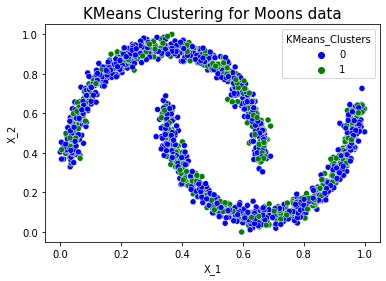

<Figure size 936x936 with 0 Axes>

In [47]:
sns.scatterplot(moons_cluster['X_1'],moons_cluster['X_2'],hue='KMeans_Clusters',data=moons_cluster,palette=['blue','green'], legend='full') 
plt.title("KMeans Clustering for Moons data",fontsize=15)
plt.figure(figsize=(13, 13))
plt.show()

In [48]:
print('Silhouette Score for K-Means :',metrics.silhouette_score(scaled_dc_moon, moons_kmeans.labels_))

Silhouette Score for K-Means : 0.5670675733300122
